# How to use


## Import

Let us first import all the necessary for this tutorial:

In [1]:
from Trajectory import MidTrajectory 
import RiskFunctions as risk_fun

- **Trajectory** contains the classes and the methods that compute the path the car should follow during the race. MidTrajectory is, for now, the only implemented algorithm.
- **RiskFunction** contains a set of function used to compute the risk of the generated plan. 

In [2]:
from GraphicUtility import plot_track_map, plot_trajectory, end_plotting
from Utils import euclidean_distance_no_sqrt, serialize_to_file

* **GraphicsUtility** contains methods to visualize the track or the trajectory in a scatter plot.
* **Utils** contains several methods such as the euclidean distance or the computation of the spline.

In [3]:
from TrackMap import TrackMap

* **TrackMap** contains the class that represents a track map.

In [4]:
from ROSInterface import trajectory_to_ros

* **trajectory_to_ros** is used to transform the internal representation of a trajectory into something we can send through a ROS message.

## Load the Track

To load the track we will utilize the ```load_track``` function provided by the ```TrackMap``` class. This method will load a track from a JSON file. You can create your own track by using our tool for the generation of tracks (see readme in create_custom_track). Our tracks are saved in ```./tests/tracks```. For the example, we will use the TarascoRace track.

In [5]:
trackMap = TrackMap()
trackMap.load_track('./tests/tracks/TarascoRace.json')

## Compute the Trajectory

To compute the path, we will create a ```MidTrajectory``` object and then use its ```compute_trajectory``` method to obtain a list of ```PlanStep```. Each ```PlanStep``` contains the position and the expected velocity in that position. However, notice that compute_trajectory will output only PlanStep with velocities equal to zero. Below, we show an example of Plan Step.

In [6]:
#create MidTrajectory object
trajectory = MidTrajectory(distance_fun=euclidean_distance_no_sqrt)
#compute the trajectory
trajectory.compute_trajectory(trackMap)
#print the first plan step
print(trajectory.get_trajectory()[0])

PlanStep(position=(225.304, 306.768), velocity=0, velocity_vector=[])


Next, we have to define the risk of the trajectory. The higher the risk, the risker the trajectory will be. For the example, we will merely put a constant risk constant, but notice that the LTP will update this risk during the race according to several parameters such as the weather. 
To set the risk, we have to call the ```set_risk``` function. Notice that we may use the method as follows:

In [7]:
trajectory.set_risk(1)
print(trajectory.current_risk)

1


However, it is not correct because the risk should always be between the constant MIN_RISK and MAX_RISK defined in CarConstants:

In [8]:
from CarConstants import MIN_RISK, MAX_RISK
print(MIN_RISK, MAX_RISK)

0.1 0.9


So, if you just need to put a constant, use the constant function defined in RiskFunction that takes into account these two constants:

In [9]:
trajectory.set_risk(risk_fun.constant(1, MIN_RISK, MAX_RISK))
print(trajectory.current_risk)

0.9


Notice that without setting a risk, the trajectory will assume the minimum risk, and therefore the resulting plan will be the safest one. 

Eventually, we compute the velocities using the ```compute_velocities``` method:

In [11]:
%%capture
trajectory.compute_velocities()

As you can read, now the velocity is not zero anymore:

In [12]:
#print the first plan step
print(trajectory.get_trajectory()[0])

PlanStep(position=(225.304, 306.768), velocity=18.3, velocity_vector=(-0.4944140526668625, -18.29331994867322))


The trajectory can be transformed into something acceptable by ROS using ```trajetory_to_ros```:

In [13]:
from typing import List, Tuple
#ros_trajectory type
ros_trajectory : Tuple[List[float], List[float], List[float], List[float]] = ()
ros_trajectory = trajectory_to_ros(trajectory)

The ros_trajectory is a tuple that contains four lists:
* the positions of the path along the x-axis
* the locations of the path along the y-axis
* the x component of the velocity vector
* the y component of the velocity vector.

## Plot the plan and the track

Using the methods defined in ```GraphicsUtility``` we can visualize the track and the plan: 

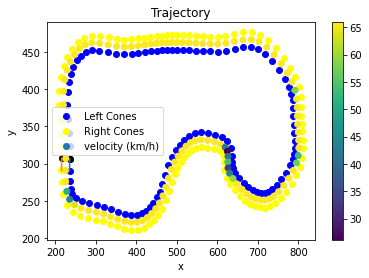

In [14]:
plot_track_map(trackMap, new_figure=True)
plot_trajectory(trajectory.get_trajectory(), new_figure=False)
end_plotting()